<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

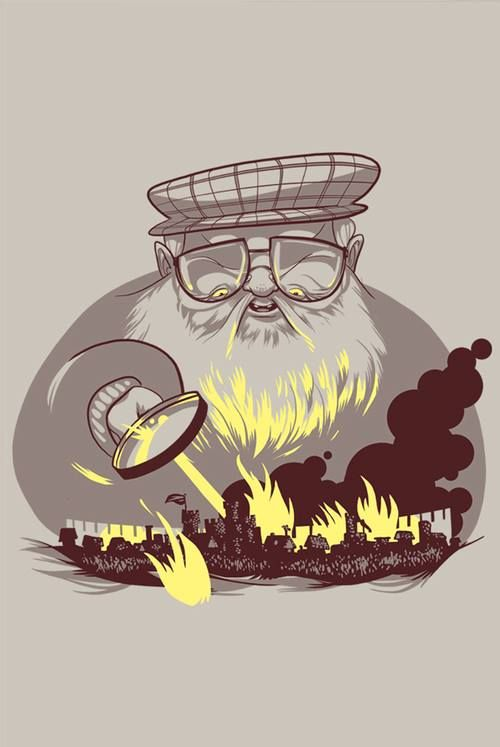

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 82.9MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [43]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/game_of_thrones_train.csv', index_col=0)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.head(10)

<BarContainer object of 25 artists>

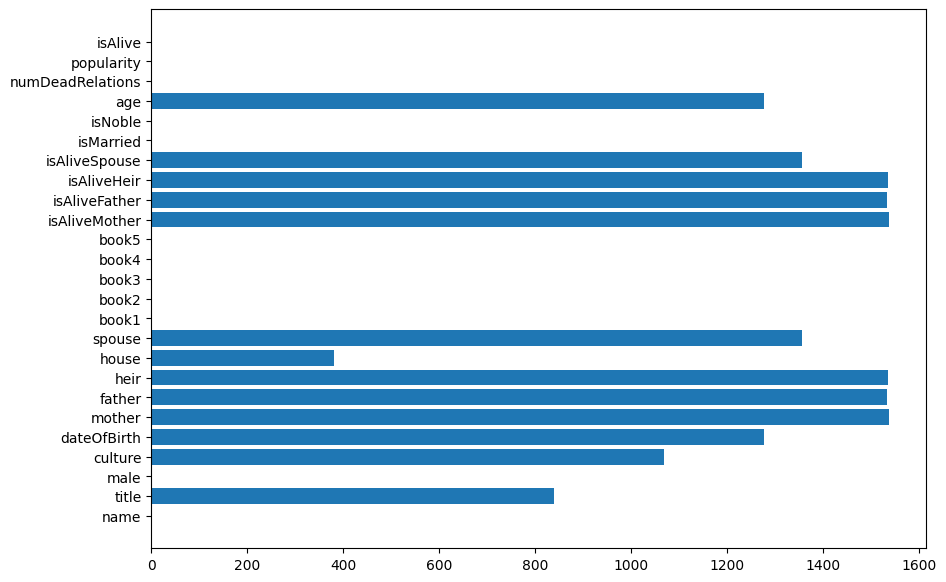

In [ ]:
#data.info()
#data.isnull().sum()
#data.describe(include = "all")
data1 = data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data1.index, data1.values)


In [7]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 35.29032258064516
Медиана = 24.0


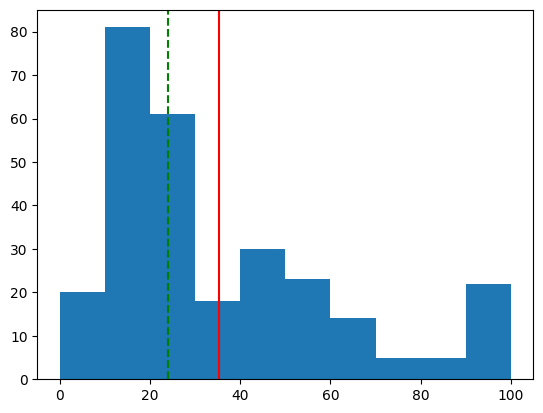

In [8]:
plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

In [9]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [10]:
mean_age = data['age'].mean()
data['age'] = data['age'].fillna(mean_age)

In [11]:
#data1 = data['title'].value_counts()

#plt.bar(data1.index, data1.values)
data['title'].mode()

,title
0,Ser


In [12]:
data['title'].value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


In [13]:
data['title'] = data['title'].replace('Highgarden', 'Ser')
data['title'] = data['title'].replace('Goldgrass', 'Ser')
data['title'] = data['title'].replace('Felwood', 'Ser')
data['title'] = data['title'].replace('Lord of Greyshield', 'Ser')

In [14]:
data['title'].fillna('Ser', inplace=True)

<ipython-input-14-d24dbd7239d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['title'].fillna('Ser', inplace=True)


<BarContainer object of 25 artists>

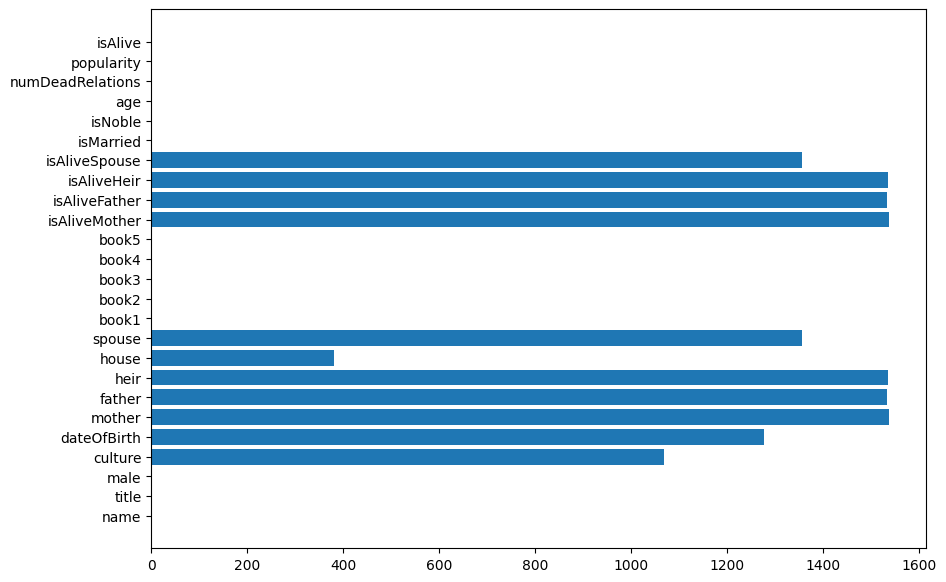

In [15]:
data1 = data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data1.index, data1.values)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [16]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

In [17]:
def has_dead_relations(row):
    """Checks if a character has any relations who are dead based on 'isAlive' columns."""
    relations_columns = ['isAliveSpouse', 'isAliveHeir', 'isAliveFather', 'isAliveMother']
    for column in relations_columns:
        if column in row and row[column] == 0:
                      return 1
    return 0


data['boolDeadRelations'] = data.apply(has_dead_relations, axis=1)

In [18]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne'],
    'Dothraki': ['dothraki'],
    'Free Folk': ['free folk', 'wildling'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Northmen': ['northmen'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['reach', 'reachmen'],
    'Riverlands': ['riverlands', 'rivermen'],
    'Stormlands': ['stormlands', 'stormlanders'],
    'Vale': ['vale', 'valemen', "vale mountain clans"],
    'Valyrian': ['valyrian'],
    'Westerlands': ['westerlands', 'westermen'],
    'Westeros': ['westeros', 'crownlands', 'crownlander'],
    'Tyroshi': ['tyroshi', 'tyrosh'],
    'Pentoshi': ['pentoshi', 'pentos'],
    'Volantene': ['volantene', 'volantis'],
    'Meereenese': ['meereenese', 'meereen'],
    'Lhazareen': ['lhazareen', 'lhazarene'],
    'Ibbenese': ['ibbenese', 'ibben']
}


def simplify_culture(culture):
    """Simplifies culture names based on the provided dictionary."""
    if pd.isna(culture):
        return "Unknown"
    culture = culture.lower()
    for simplified_name, variations in cult.items():
        if any(variation in culture for variation in variations):
            return simplified_name
    return "Other"

data['simplified_culture'] = data['culture'].apply(simplify_culture)

In [ ]:
data.head(10)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [20]:
data.drop(columns=['isAliveSpouse'], inplace=True)

In [21]:
data.drop(columns=["dateOfBirth", 'isAliveHeir', 'isAliveFather', 'isAliveMother', 'spouse', 'heir', 'father', 'mother', 'culture'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [22]:
target_variable = 'isAlive'
target_type = data[target_variable].dtype

if target_type in [object, bool, 'category']:
  print(f"The target variable '{target_variable}' is categorical.")


  class_distribution = data[target_variable].value_counts(normalize=True)
  print("\nClass Distribution:")
  print(class_distribution)

  if class_distribution.min() < 0.4:
    print("\nThe dataset is imbalanced.")
  else:
    print("\nThe dataset is relatively balanced.")

elif target_type in [int, float]:
  print(f"The target variable '{target_variable}' is quantitative.")
  print("This might not be suitable for a classification task. Consider converting it to categorical if necessary.")
else:
  print(f"The target variable '{target_variable}' has an unexpected data type: {target_type}")
  print("Please ensure it's either categorical or quantitative for classification tasks.")

The target variable 'isAlive' is quantitative.
This might not be suitable for a classification task. Consider converting it to categorical if necessary.


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
from sklearn.preprocessing import LabelEncoder


categorical_features = data.select_dtypes(include=['object', 'category']).columns
numerical_features = data.select_dtypes(include=['number']).columns


label_encoders = {} e
for feature in categorical_features:
  le = LabelEncoder()
  data[feature] = le.fit_transform(data[feature])
  label_encoders[feature] = le


correlation_matrix = data[numerical_features].corr()
print("Correlation Matrix for Numerical Features:")
print(correlation_matrix)


threshold = 0.8
highly_correlated = correlation_matrix[correlation_matrix.abs() > threshold]
print("\nHighly Correlated Features (above threshold):")
print(highly_correlated[highly_correlated != 1])


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(data.drop(columns=['isAlive']), data['isAlive'])

feature_importances = pd.Series(rf.feature_importances_, index=data.drop(columns=['isAlive']).columns)
feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=feature, y='isAlive', data=data)
  plt.title(f"Relationship between '{feature}' and 'isAlive'")
  plt.show()


for feature in numerical_features:
  if feature != 'isAlive':  # Exclude the target variable
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='isAlive', data=data)
    plt.title(f"Relationship between '{feature}' and 'isAlive'")
    plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [25]:

X = data.drop(columns=['isAlive'])  # Features
y = data['isAlive']               # Target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1557, 17)
Shape of y: (1557,)


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [26]:
from sklearn.model_selection import train_test_split

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1245, 17)
X_test shape: (312, 17)
y_train shape: (1245,)
y_test shape: (312,)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "Gaussian NB": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy}\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.7788461538461539

Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.8044871794871795

Training AdaBoost...
AdaBoost Accuracy: 0.8012820512820513

Training Gaussian Process...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gaussian Process Accuracy: 0.5993589743589743

Training Gaussian NB...
Gaussian NB Accuracy: 0.7628205128205128

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.7147435897435898

Training SVC...
SVC Accuracy: 0.7532051282051282

Training Decision Tree...
Decision Tree Accuracy: 0.7403846153846154



## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [31]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "Gaussian NB": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}  # accuracy for each model

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# the highest accuracy
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print(f"The best model is {best_model} with an accuracy of {best_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The best model is Random Forest with an accuracy of 0.8076923076923077


### Файл `submission.csv`


Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [51]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/game_of_thrones_test.csv", index_col='S.No')

training_features = X.columns.tolist()

if 'S.No' in training_features:
    training_features.remove('S.No')
    X = X.drop(columns=['S.No'])
    model.fit(X, y)

test_features = pd.DataFrame(index=test_data.index, columns=training_features)

for feature in training_features:
    if feature in test_data.columns:
        test_features[feature] = test_data[feature]

for col in test_features.select_dtypes(include=['object']).columns:

    le = LabelEncoder()
    combined_values = pd.concat([X[col], test_features[col]], ignore_index=True).astype(str)  # Handle potential NaNs
    le.fit(combined_values.unique())
    test_features[col] = le.transform(test_features[col].astype(str))  # Handle potential NaNs

predictions = model.predict(test_features)

submission = pd.DataFrame({'S.No': test_data.index, 'isAlive': predictions})


submission.to_csv("/content/drive/MyDrive/Colab Notebooks/new_submission.csv", index=False)
print("Predictions saved to new_submission.csv in your Google Drive")

Predictions saved to new_submission.csv in your Google Drive
